In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [13]:
df.shape

(23, 2)

Text(0, 0.5, 'Height')

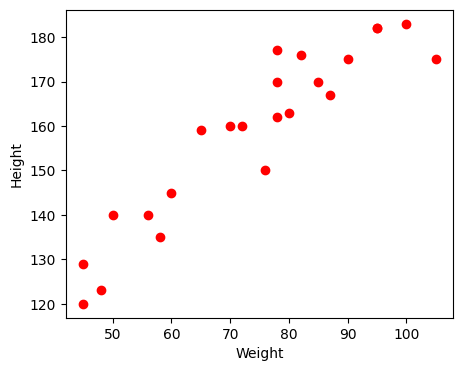

In [6]:
##scatter plot
plt.figure(figsize=(5,4))
plt.scatter(df["Weight"],df["Height"],color="red")
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


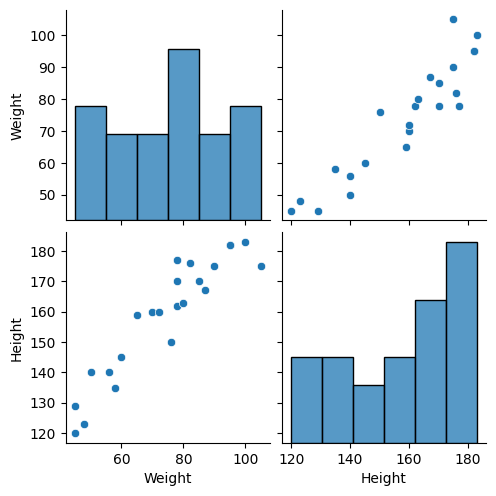

In [8]:
##Pair plot
sns.pairplot(df)

In [9]:
X = df[["Weight"]]  ##independent features should be in 2d array
Y = df["Height"]   ##dependent features may be series or 1d array

In [14]:
##Train Test Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.25,random_state=42)

In [15]:
X_train.shape

(5, 1)

In [16]:
##standardization
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [20]:
X_train

array([[ 1.46726488],
       [-0.79006571],
       [ 0.05643326],
       [ 0.62076591],
       [-1.35439836]])

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_test

array([[ -1.918731  ],
       [ -1.918731  ],
       [-11.23021969],
       [  2.8780965 ],
       [ -5.58689322],
       [  5.69975974],
       [ -7.56205748],
       [  4.28892812],
       [ -1.918731  ],
       [-10.38372072],
       [  2.8780965 ],
       [-11.23021969],
       [ -6.99772483],
       [ -4.1760616 ],
       [ -2.48306365],
       [ -9.81938807],
       [ -8.12639013],
       [ -3.61172895]])

In [21]:
##Linear regression model
from sklearn.linear_model import LinearRegression

In [22]:
regression = LinearRegression()

In [23]:
regression.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [2.04288419]
Intercept: 170.2


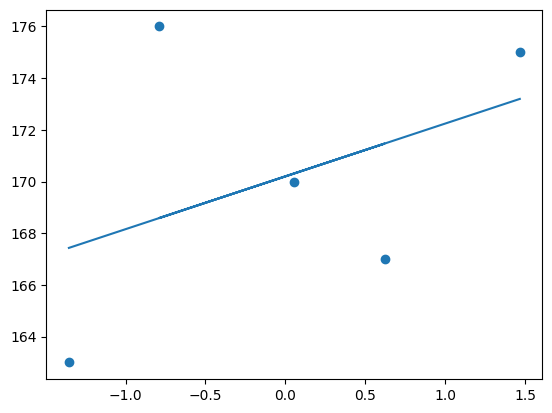

In [29]:
##Plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [30]:
##Prediction for the test data
y_pred = regression.predict(X_test)

In [31]:
##Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 170.46757024174974
Mean Absolute Error: 10.398443029016278
Root Mean Squared Error: 13.056322998522583


In [33]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(Y_test,y_pred)

In [40]:
print("R-squared:",score)

R-squared: 0.5834226395468012


In [39]:
##Display adjusted R-squared
print("Adjusted R-squared:",1-(1-score)*(len(Y_test)-1) / (len(Y_test)-X_test.shape[1]-1))

Adjusted R-squared: 0.5573865545184762


In [45]:
##OLS Linear Regression
import statsmodels.api as sm

In [47]:
model = sm.OLS(Y_train,X_train).fit()

In [48]:
prediction = model.predict(X_test)
print("Prediction:",prediction)

Prediction: [ -3.91974522  -3.91974522 -22.94203822   5.87961783 -11.4133758
  11.64394904 -15.44840764   8.76178344  -3.91974522 -21.21273885
   5.87961783 -22.94203822 -14.2955414   -8.53121019  -5.07261146
 -20.05987261 -16.60127389  -7.37834395]


In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.250
Method:                 Least Squares   F-statistic:                          0.0005759
Date:                Wed, 31 Dec 2025   Prob (F-statistic):                       0.982
Time:                        23:12:20   Log-Likelihood:                         -32.781
No. Observations:                   5   AIC:                                      67.56
Df Residuals:                       4   BIC:                                      67.17
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\sajin\OneDrive\Desktop\Udemy_DS\myenv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [56]:
##Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\sajin\OneDrive\Desktop\Udemy_DS\myenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([162.82165605])